##### 생선의 무게와 크기로 생선 분류
- 데이터셋 : fish.csv
- 피쳐/입력데이터 : Weight, Length
- 타겟/클래스/출력 : Species
- 기계학습 방법 : 지도학습 ==> 분류 
- 분류 알고리즘(문제해결방법) : 미정

In [1]:
### [1] 데이터 살펴보기
### [1-1] 데이터 준비

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
# 경로 => 상대경로, 절대경로
# 상대경로 : 현재 파일을 기준으로 경로를 설정 
# - ./ : 의미 현재 위치 의미
# - ../ : 상위 즉, 한단계 위의 위치 의미
DATA_FILE='../data/fish.csv'

# 절대경로 : 드라이브(C, D, E ...)를 기준으로 경로를 설정
DATA_FILE2=r'C:\Users\anece\Desktop\KDT\6기\ML_WORK\data\fish.csv'

In [6]:
## CSV ==> DataFrame으로 읽어오기 
## - 첫번째 줄 : 컬럼명 존재
## - 구분자 : 쉼표
## - 로딩컬럼 : Species,Weight,Length 즉, 0, 1, 2
#fishDF=pd.read_csv(DATA_FILE, usecols=['Species','Weight','Length'])
fishDF=pd.read_csv(DATA_FILE, usecols=[0,1,2])

In [8]:
### [1-1] 데이터 확인
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [13]:
### [1-2] 컬럼별 결측치 체크 
### -> isnull() X
### -> 컬럼별 고유값 체크 ==> 개수
fishDF.value_counts()

Species    Weight  Length
Roach      160.0   22.5      2
Perch      120.0   22.0      2
Bream      600.0   32.0      2
           700.0   33.0      2
           242.0   25.4      1
                            ..
Perch      100.0   18.0      1
           110.0   21.0      1
                   22.0      1
           115.0   21.0      1
Whitefish  1000.0  40.0      1
Name: count, Length: 155, dtype: int64

In [14]:
### [1-3] 컬럼별 중복값 체크
### => 길이와 무게가  같다고해서 높이,너비, 대각선 길이가 같지 X
### => 중복데이터 유지

In [52]:
### [2] 피쳐와 타겟의 관계, 피쳐와 피쳐의 관계
### [2-1]피쳐와 타겟의 관계 ==> 어느정도의 연관성이 있는지 확인
### => 상관계수 확인
### => object 타입의 품종을 int로 변환한 컬럼 추가 Species_Code
### ndarray ==>list 형변환
names=fishDF['Species'].unique().tolist()
{ name:idx for idx, name in enumerate(names) }    # 딕셔너리 컨프리헨션 dict comprehension

{'Bream': 0,
 'Roach': 1,
 'Whitefish': 2,
 'Parkki': 3,
 'Perch': 4,
 'Pike': 5,
 'Smelt': 6}

In [23]:
values={'Bream':1, 'Roach':2, 'Whitefish':3, 'Parkki':4, 'Perch':5, 'Pike':6, 'Smelt':7}
fishDF['Code']=fishDF['Species'].replace(values)

In [25]:
fishDF.head(2)

,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1


In [26]:
# 7가지 종류에 대한 상관계수
fishDF.corr(numeric_only=True)

,Weight,Length,Code
Weight,1.000000,0.918618,-0.176783
Length,0.918618,1.000000,-0.118425
Code,-0.176783,-0.118425,1.000000


In [29]:
# 도미(Bream), 빙어(Smelt)에 대한 상관계수
mask=(fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')
twofishDF=fishDF[mask]
twofishDF.corr(numeric_only=True)

,Weight,Length,Code
Weight,1.000000,0.960347,-0.843828
Length,0.960347,1.000000,-0.944132
Code,-0.843828,-0.944132,1.000000


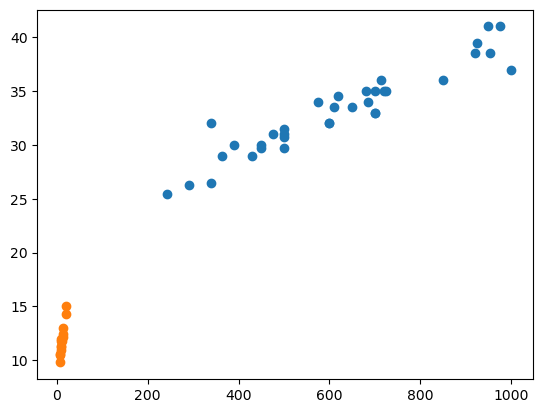

In [40]:
# 도미(Bream), 빙어(Smelt)에 대한 시각화 ==> 2개 피쳐 Weight, Length로 Bream,Smelt 분류 가능함
plt.scatter(twofishDF.loc[:34, 'Weight'], twofishDF.loc[:34, 'Length'])
plt.scatter(twofishDF.loc[145:, 'Weight'], twofishDF.loc[145:, 'Length'])
plt.show()

[3] 학습/훈련 진행 
- 지도학습 ==> 분류
- ML프레임워크 ==> Scikit-learn
- 학습알고리즘 ==> 최근접이웃 알고리즘 즉, KNN

In [53]:
### 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [54]:
### [1] 학습 인스턴스 생성 ==> 클래스명(매개변수 값 )
model=KNeighborsClassifier()

In [57]:
print(model, model.n_neighbors)  # ERROR, model.classes_)

AttributeError: 'KNeighborsClassifier' object has no attribute 'classes_'

In [61]:
### [2] 학습/훈련 진행
#model.fit(피쳐2D, 타겟1D)
features=twofishDF[['Weight','Length']]
target=twofishDF['Code']

print(f'features.shape : {features.shape}, {features.ndim}D')
print(f'target.shape   : {target.shape}, {target.ndim}D')

features.shape : (49, 2), 2D
target.shape   : (49,), 1D


In [62]:
model.fit(features, target)

KNeighborsClassifier()

In [65]:
# 모델 파라미터(Model Parameter) : 학습 후 설정되는 속성 
# - 파라미터 이름 : XXX_ 
print(model.classes_, model.feature_names_in_)

[1 7] ['Weight' 'Length']


[4] 검증 
- KNN은 모델 즉 규칙 및 패턴이 생성 X
- 검증 데이터가 입력이 되면 학습 데이터와 거리 측정
- 지정된 k 개수 만큼 검증 데이터와 가까운 데이터를 도출
- 분류일 경우 K 개수 데이터가 가진 라벨/타겟/클래스에 따라 다수결로 결정 

In [66]:
twofishDF.head()

,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1


In [84]:
# 검증 데이터와 타겟 
data=twofishDF.loc[:4, ['Weight','Length']]
target=twofishDF.loc[:4, 'Code']

data.shape, data.ndim, target.shape, target.ndim

((5, 2), 2, (5,), 1)

In [88]:
# 예측결과와 정답을 비교해서 점수를 도출
# - model.score(2D피쳐, 1D타겟)
# - 결과 : 0.0 ~ 1.0
model.score(data, target)

1.0

In [89]:
# 새로운 데이터에 대해서 결과를 예측 
# - model.predict(2D) ==> 1D
pre_target = model.predict(data)
pre_proba = model.predict_proba(data)

In [91]:
pre_proba, model.n_neighbors

(array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]),
 5)

In [102]:
data.iloc[[0]]

distance, index = model.kneighbors(data.iloc[[0]])
print(distance, index, sep='\n')

[[  0.          48.00843676  98.00617327  98.22199346 121.05354187]]
[[ 0  1  2 13  3]]


In [105]:
index.tolist(), distance.tolist()

([[0, 1, 2, 13, 3]],
 [[0.0,
   48.00843675855318,
   98.00617327495243,
   98.22199346378589,
   121.05354187300757]])